<a href="https://colab.research.google.com/github/samuel-haddad/ClusteringReview/blob/main/cc_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Machine Learning: Clustering**

## **Setup**

In [ ]:
%%capture

# setup do environment
!pip install dataprep

import pandas as pd 
import numpy as np 
import math 
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

from dataprep.eda import create_report 

from sklearn.cluster import KMeans,DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer 
from sklearn.decomposition import PCA 

In [ ]:
# import the dataset and create the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/samuel-haddad/credit_card_clustering/main/CC%20GENERAL.csv', delimiter=',')

## **Business Problem**

####**Create customer groups from credit card usage data to develop relationship marketing strategies.**

The bank has a database with a 6-month history of current account balance and credit card usage. In this exploration, the objective is to understand what these data explain about the profile and/or behavior of these customers, as well as to group them, understanding their differences and similarities. Finally, useing these groups, the marketing department should be able to develop relationship strategies.



### **Model Theory**

Clustering techniques aim to reduce observations by grouping them according to varied criteria, but generally seeking:

1. Greater internal similarity (within groups)
2. Less external similarity (inter groups - external)

These similarities are verified by looking at the distances between observations. These distances can be calculated in different ways, but before presenting some of them, it is important to emphasize that, as they are distance measurements, we can state that this type of analysis is performed on continuous or discrete metric variables. **Categorical variables should not be used in these clustering models**, but they can help to understand groups of observations after applying them.
<br><br>

####**Distances**
Regarding distances, the two main ones are:
- Euclidean (most used)

>$d_E=\sqrt{\sum_{i=1}^k(x_i-w_i)^2}$

- Minkowsky

>$d_p(x_i,x_j)=(\sum_{k=1}^d|x_i-w_i|^p)^\frac{1}{p}$
<br><br>

#### **Methods**

**Hierarchical**<br>
The hierarchical method, also known as **dendogram** (which is actually the method's output), is a method in which groupings are created as distances between observations increase. At each level, a number of groups are created. This method, however, is usually not very efficient for large volumes of data.<br>

**Main techniques:**
- Single Linkage (closest neighbor)
- Complete linkage (farthest neighbor)
- Average linkage
- Centroid method (centroid)
- Ward's method
<br>

**Application Roadmap**
1. Definition of technique.
2. Calculation of distances (from standardized data).
3. Grouping fur shorter distance.
4. Definition of the distance between the first group and the others.
5. Repeat the previous step until you have a single group (top of dendrogram)
6. Draw the dendrogram,
<br>

**Number of clusters**<br>
The choice of the number of clusters can also be done in different ways. Overall, we seek a balance between the incremental gain from increasing the number of clusters and the costs involved (business, processing, marketing, etc). When this increase in the number of clusters no longer produces such distinct groups (closer, with less variability between them), this is usually where the ideal quantity (candidate) to work is.
- R²: the bigger, the better (greater distance between, lesser intra)
- Elbow (cotevel method): a number of clusters is searched for in the graph curve, where the variability between clusters becomes smaller.
- Silhoutte: compares the indoor x outdoor distances - the closer to 1 the better.
- CCC: search for the "fall" point on the graph, where the incremental gain falls.
<br><br>

**Non-hierarchical** <br>
In the non-hierarchical method, the process is performed iteratively from initial seeds, looking for a number of previously defined groups. The goal is still the same, to seek the greatest similarity within the group and the greatest possible between groups. These iterations are repeated until the data converge, that is, the changes cease to occur or become minimal. <br>

The techniques presented above in the topic of hierarchical method can be used to define the number of clusters in some cases of non-hierarchical modeling.

**k-Means**
1. A first centroid is selected.
2. The groups are created (marked)
3. The centroids are updated.
4. The process is repeated until convergence
<br>

**DBscan**
Density-based. In other words, groups are determined based on data density. For this, two parameters are defined:
- Eps: radius for determining the closest points.
- MinPts: minimum number of points within a point's radius (Eps-neighbors).


## **Data understanding**

This database has characteristics of a market I don't know much about. Therefore, my focus will be on building the model and presenting the results rather than interpreting the behaviors. Any collaboration that helps to improve this interpretation will be very well received.

**Data Dictionary**

The first step is to know and understand the data and how it helps to understand profiles and behaviors: 

<br>


- **CUSTID**: Identification of Credit Card holder (Categorical) <br>
- **BALANCE**: Balance amount left in their account to make purchases <br>
- **BALANCEFREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) <br>
- **PURCHASES**: Amount of purchases made from account <br>
- **ONEOFFPURCHASES**: Maximum purchase amount done in one-go <br>
- **INSTALLMENTSPURCHASES**: Amount of purchase done in installment <br>
- **CASHADVANCE**: Cash in advance given by the user <br>
- **PURCHASESFREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) <br>
- **ONEOFFPURCHASESFREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) <br>
- **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) <br>
- **CASHADVANCEFREQUENCY**: How frequently the cash in advance being paid <br>
- **CASHADVANCETRX**: Number of Transactions made with "Cash in Advanced" <br>
- **PURCHASESTRX**: Numbe of purchase transactions made <br>
- **CREDITLIMIT**: Limit of Credit Card for user <br>
- **PAYMENTS**: Amount of Payment done by user <br>
- **MINIMUM_PAYMENTS**: Minimum amount of payments made by user <br>
- **PRCFULLPAYMENT**: Percent of full payment paid by user <br>
- **TENURE**: Tenure of credit card service for user
<br>
<br>
---
<br>


**Preliminary conceptual analysis of variables** <br>

I organized a conceptual framework, classifying the variables based on their relationship and the interpretations we can have. The purpose of this chart is to help understand the variables and help analyze the profiles later.

<br>
<br>

<img src="https://lucid.app/publicSegments/view/33a7bf52-24f5-4d18-ab19-4610fe95331e/image.png" alt="Agrupamento das métricas">

### **EDA**

In [ ]:
# creating EDA report and open the html file
CC_EDA = create_report(df)
CC_EDA.save('CC_EDA') # save as html file to better explore data in a browser tab

Report has been saved to CC_EDA.html!


####**Highlights**

From the EDA report, some aspects of our dataset are highlighted below:

<br>


**1. Variables** <br>
There are 18 variables in the base, with only one categorical (CUSTOM_ID), which should not be used in the clustering process. Looking at the overall statistics of the dataset, it can be seen that the treatment required is minimal, with no duplicate rows and only 0.2% missing cells.

<br>

**2. Distributions** <br>
Most variables have asymmetric distributions with high inflation of zeros and elongated tails. By the characteristic of the base, this is a possible behavior, because they broadly represent the consumption capacity of a population, which follows a similar distribution (the higher the financial capacity, the lower the number of customers).

The CREDIT_LIMIT variable, although also asymmetric and elongated, has the lowest coefficient of variation, being an interesting variable to observe regarding the distribution of clusters.

<br>

**3. Correlations (Pearson)**<br>
The highest **positive** correlations are between: 
- PURCHASES and ONEOFF_PURCHASES (0.92)
- PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY (0.86)
- CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX (0.80)

Among the **negatives**, there are:
- PRC_FULL_PAYMENT and BALANCE (-0.32)
- PURCHASES FREQUENCY and CASH_ADVANCE_FREQUENCY (-0.31)
- CASH_ADVANCE_FREQUENCY and PRC_FULL_PAYMENT (-0.25) 

<br>

**4. Missing values**<br>
There are 314 missing data (0.2%) in only two variables, CREDIT_LIMIT (1) and MINIMUM_PAYMENTS (313). This data should be treated iteratively and by looking at the distribution of the data.

<br>

**5. Models**
By observing the dataset characteristics it is already possible to intuit some points about the models to be tested, however, this does not eliminate the need for testing.
1. hierarchical model: probably will not be as efficient, due to the large volume of data.
2. Kmeans: may be a good alternative, but the clustering methods will need to be tested.
3. DBscan (density-based methods): the basis seems to point to concentration of the data, which does not favor such models. Running a PCA after processing the data may help to get this clearer picture.

## **Data prep**

As a result of data exploration, only two data treatments are required:

1. Treatment of missing data
2. Data standardization

In [ ]:
# transform CUST_ID collum in index column
df_model = df.set_index('CUST_ID',drop=True)

# remove categorical variables
df_model = df.select_dtypes(exclude=['object'])

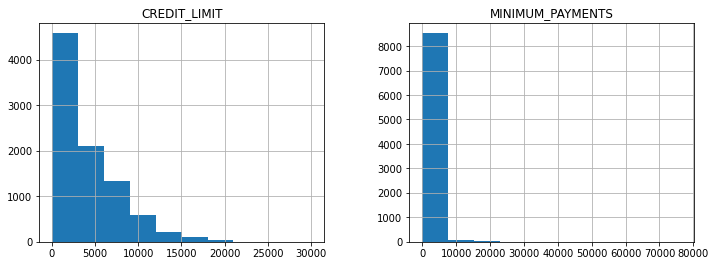

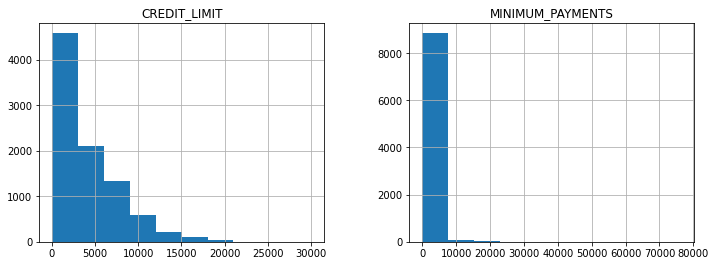

In [ ]:
# replacing missing values with an regressive model
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_model[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']])
IterativeImputer(random_state=0)
temp = imp.transform(df_model[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']])
df_model2 = df_model.copy()
df_model2[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']] = temp


'''
ALTERNATIVE:
Replace the missing values with Simple Imputer class

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df_model[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']])
SimpleImputer()
temp = imp.transform(df_model[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']])
df_model2 = df_model.copy()
df_model2[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']] = temp

'''

# analysing the distribuition (after/before)
df_model[['CREDIT_LIMIT','MINIMUM_PAYMENTS']].hist(layout=(5,4), figsize=(25,25))
df_model2[['CREDIT_LIMIT','MINIMUM_PAYMENTS']].hist(layout=(5,4), figsize=(25,25))
plt.show()


In [ ]:
# checking if the missing values problem was solved
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
# standard scaling transform
sc = StandardScaler()
X = sc.fit_transform(df_model2)

# replacing the standarized data
cols = df_model2.columns.values.tolist()
df_scale = pd.DataFrame(data=X, columns=cols)

# check the dataset statistics
df_scale.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.195651e-16,1.209548e-14,-9.278518e-16,3.916048e-15,2.275424e-15,5.693056e-15,-3.716084e-16,2.021052e-15,2.353921e-16,5.729495e-16,-7.151821e-16,-3.570713e-15,-4.198640e-15,-2.421651e-16,-6.879041e-17,-2.201566e-15,1.556446e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221531e+00,-5.986883e-01,-3.697836e-01,-5.255510e-01,-4.122768e+00
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.955208e-01,-4.662913e-01,-2.964911e-01,-5.255510e-01,3.606795e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.107373e-01,-3.026846e-01,-2.258018e-01,-5.255510e-01,3.606795e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.512214e-01,5.802976e-02,-1.342856e-02,-3.712234e-02,3.606795e-01
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.010087e+00,1.692228e+01,3.240972e+01,2.893453e+00,3.606795e-01


## **Data modeling**

### **Elbow Method** <br>
First step is to understand the number of clusters that will be created. For this, we will use the Elbow method, which allows us to observe the relative gain with the increase in the number of clusters. However, this decision does not need to be based exclusively on it, since it is not a test or a statistic, it can only serve as another source of information.

<br>

>$minimize(\sum_{i=1}^{n}W(C_k))$, where $C_k$ is the $k$ cluster and $W(C_k)$ is the inside cluster variation.
 

<br>

In order to obtain a mathematical reference, we will use a function that calculates the distance between the points and the line and returns the greatest distance, which represents the point of greatest inflection. It is important to note, however, that this optimal amount of clusters will vary with the maximum number of clusters selected for the calculation.

<br>

>$distance(P_0,P_1,(x,y))=\frac{|(y_1-y_0)x-(x_1-x_0)y+x_1y_0-y_1x_0|}{\sqrt{(y_1-y_0)^2+(x_1-x_0)^2}}$

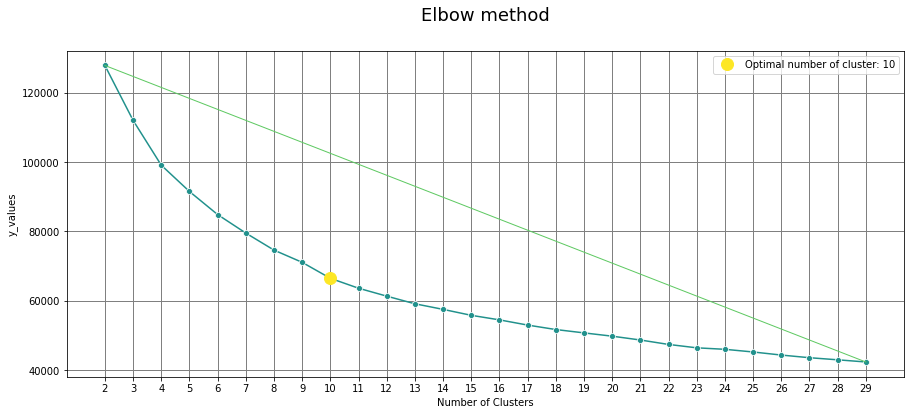

In [ ]:
# Elbow method to determine the amount of clusters

'''
# Another wcss calculation function:

def calculate_wcss(data):
    wcss = []
    for n in range(1, 30):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    
    return wcss
'''

# setups
min_clusters = 2
max_clusters = 30

# wcss calculation
wcss = []
k = range(min_clusters, max_clusters)
for i in k:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(df_scale)
    wcss.append(kmeans.inertia_)


# Optiomal number of clusters calculation
 
'''
OPTIMAL NUMBER OF CLUSTER
Function that calculate the distances from 
the points (clusters amount) to the line,
that links the point a0 (min clusters) and
an (max clusters), and returns the maximun value. 
Credits: https://jtemporal.com/kmeans-and-elbow-method/

'''

def optimal_number_of_clusters(wcss): 
    x1, y1 = min_clusters, wcss[0]
    x2, y2 = max_clusters, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances))+ min_clusters


# calculating the within clusters sum-of-squares for 30 cluster amounts
sum_of_squares = wcss
    
# calculating the optimal number of clusters
n = optimal_number_of_clusters(sum_of_squares)

# pegando o Y correspondente para destaque
y_n = np.interp(n, k, wcss)

# plotting the graph
line = pd.DataFrame({'x_values':[min_clusters,max_clusters-1], 
                     'y_values':[wcss[0],wcss[len(wcss)-1]]})
                  
plt.figure(figsize=(15, 6))
plt.xticks(k)
ax = sns.lineplot(x=k, y=wcss, markers=True, marker='o', color='#21918c')
dot = ax.plot(n,y_n, 'r+', marker='o', color='#fde725',markersize=12)
line_plot = sns.lineplot(data=line, x='x_values', y='y_values', linewidth=1, color='#5ec962')
ax.legend(dot,['Optimal number of cluster: {}'.format(n)],bbox_to_anchor= (1, 1))
ax.grid(which='major', color='gray', linestyle='-', linewidth=1)
ax.set(xlabel='Number of Clusters')
ax.set_title('Elbow method', fontsize=18,pad=30)
ax;

####**Elbow method results**
The elbow method brought as **optimal number of clusters 10 groups**. This number identifies the point of greatest inflection of the curve. Thus, from this value, the gain of differentiation between groups and proximity within groups becomes smaller and smaller as more groups are created.

### **K-Means**

The calculation of the optimal number of clusters resulted in the creation of 10 groups. However, when observing the number of clients per cluster, there is a relatively small number of users in some clusters:

<br>

CLUSTER | COUNT
--------|-------
0       | 44
1       | 2496
2       |	351
3 	    | 25
4 	    | 1034
5 	    | 181
6 	    | 1949
7 	    | 1167
8 	    | 1088
9 	    | 615


Thinking as a marketing action, this number can make certain actions unfeasible. Thus, combining the analysis of the curve of the Elbow method, the observation of the number of customers per cluster and the preservation of inter and intra-group distances, it is suggested to work with 6 clusters and not 10. The results will be presented and analyzed below. . Just to compare with the previous table, I put below the result that will be obtained with the generation of 6 clusters.


<br>

CLUSTER | COUNT
--------|-------
0 	    | 1311
1 	    | 2229
2 	    | 965
3 	    | 1323
4 	    | 82
5 	    | 3040

In [ ]:
# confirming (or changing) the number of clusters that will be created
n=6

# running kmeans to our optimal number of clusters
kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(df_scale)

# clusters list
kmeans.labels_
labels_kmeans = kmeans.labels_

# adding clusters dimensions to the dataframe
df_scale_kmeans = df_scale.copy()
df_scale_kmeans['CLUSTER'] = labels_kmeans

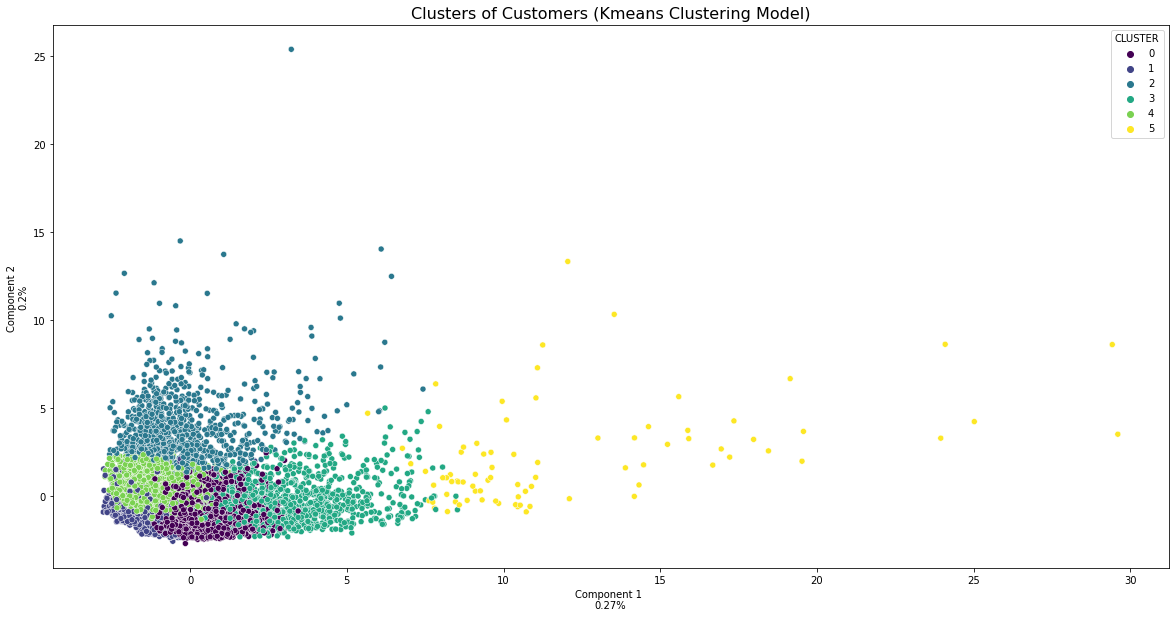

In [ ]:
# running a PCA model to plot the clusters
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scale)

component_1_ratio = round(pca.explained_variance_ratio_[0],2)
component_2_ratio = round(pca.explained_variance_ratio_[1],2)
pca_dataframe = pd.DataFrame(data = principal_comp,columns = ['component_1','component_2'])

# concat labels with to the pca dataframe
pca_dataframe_kmeans = pd.concat([pca_dataframe,pd.DataFrame({'CLUSTER':df_scale_kmeans['CLUSTER']})],axis = 1)

# let's finally plot the clusters
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x = "component_1", y = "component_2", hue = "CLUSTER",data = pca_dataframe_kmeans, palette = 'viridis',legend='full')
ax.set_title('Clusters of Customers (Kmeans Clustering Model)', size=16)
ax.set(xlabel='Component 1 \n{}%'.format(component_1_ratio), ylabel='Component 2 \n{}%'.format(component_2_ratio))
ax;

####**Other tested models**
1. The large volume of data does not favor the use of a **hierarchical** model. The result of this model proved to be difficult to interpret.
2. Models such as **DBscan** were also not interesting in this analysis, as the data are highly concentrated, as can be seen in the scatter plot presented (PCA). This behavior makes models based on data density less efficients.

##**Analytics**

To analyze the results and better understand the clusters, we are going to concatenate the variable of the clusters generated with the non-standardized data from the database. Next, let's plot a series of comparative bar charts broken down by groupings.

In [ ]:
# concatenating the new cluster column with the original base
df_cluster = pd.concat([df_model2, pd.DataFrame({'CLUSTER':labels_kmeans})], axis=1)

In [ ]:
# checking the number of clients per cluster
cluster_quant = pd.DataFrame(df_cluster['CLUSTER'].value_counts())
cluster_quant.reset_index(inplace=True)
cluster_quant.rename(columns={'index':'CLUSTER', 'CLUSTER':'COUNT'}, inplace=True)
cluster_quant.sort_values(by=['CLUSTER'], inplace=True)
cluster_quant

,CLUSTER,COUNT
1,0,2229
3,1,1311
4,2,965
2,3,1323
0,4,3040
5,5,82


In [ ]:
# plotting the series of graphes

# group by mean
describe_clusters_mean = df_cluster.groupby('CLUSTER').mean()

## creating variables and clusters lists
# clusters_list = list(df_cluster['CLUSTER'].unique())
#columns_list = list(df_cluster.columns[:17])

# creating variables group lists
ability_to_pay = ['BALANCE','BALANCE_FREQUENCY','CREDIT_LIMIT','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT'] 
tenure = ['TENURE']
cash_advance_metrics = ['CASH_ADVANCE','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX']
payment_methods =['PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',] 
spents = ['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES_TRX','PAYMENTS',]



In [ ]:
describe_clusters_mean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTER,,,,,,,,,,,,,,,,,
0,4787.142413,0.973224,498.641000,315.414509,183.322406,4736.552175,0.287572,0.138341,0.186283,0.492313,15.061321,7.647170,7793.589194,3735.956296,2095.707755,0.035332,11.636792
1,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
2,2919.255372,0.987086,5218.824362,3288.421559,1931.347685,520.293092,0.954446,0.723794,0.775176,0.069158,1.628346,72.634646,8760.629921,4863.574071,1553.999317,0.276950,11.932283
3,814.132552,0.770575,396.295674,247.022784,149.721991,1040.113427,0.409235,0.120117,0.271585,0.185734,3.052395,5.109281,2470.627727,606.040895,371.892588,0.159189,7.336826
4,1090.120099,0.804707,275.024646,213.037233,62.205807,585.792655,0.168280,0.086115,0.079985,0.111684,2.147034,2.995862,3435.288276,1040.223303,631.990440,0.074818,11.879448
5,833.457366,0.932048,1095.931841,482.473022,613.762862,188.652762,0.875608,0.269953,0.709106,0.038609,0.747447,20.449285,4054.339773,1231.209751,642.766284,0.262970,11.884956


####**Ability to pay**

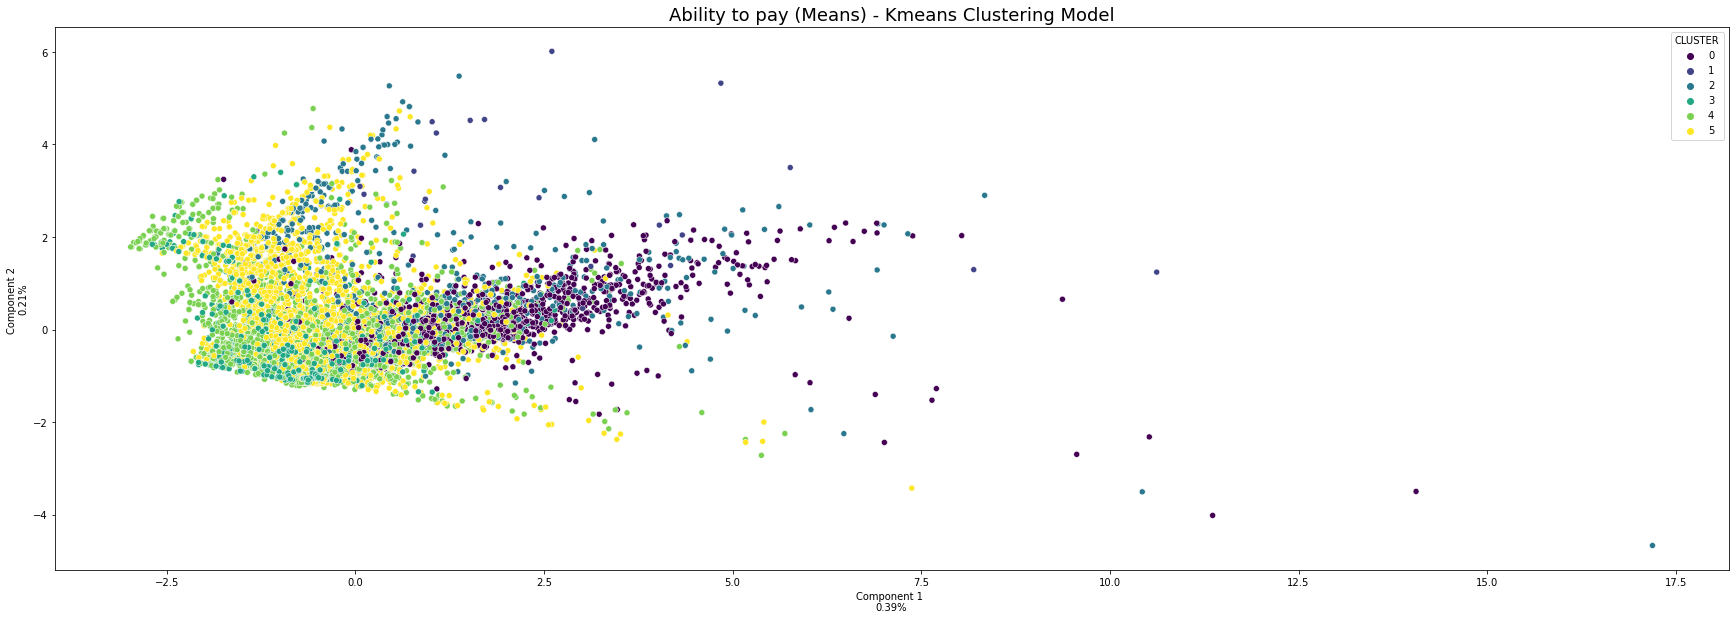

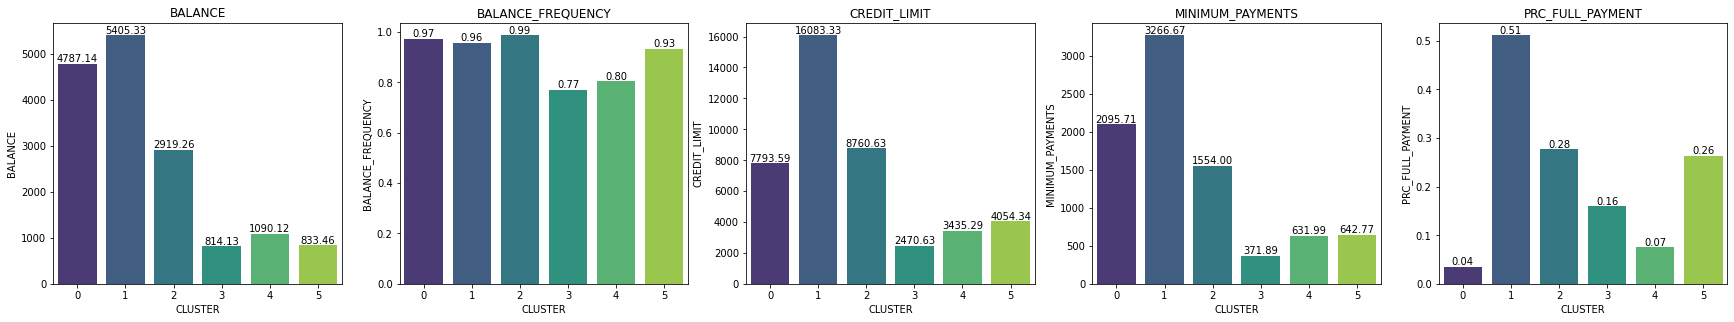

In [ ]:
# running a PCA model to plot the clusters
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scale[ability_to_pay])

component_1_ratio = round(pca.explained_variance_ratio_[0],2)
component_2_ratio = round(pca.explained_variance_ratio_[1],2)
pca_dataframe = pd.DataFrame(data = principal_comp,columns = ['component_1','component_2'])

# concat labels with to the pca dataframe
pca_dataframe_kmeans = pd.concat([pca_dataframe,pd.DataFrame({'CLUSTER':df_scale_kmeans['CLUSTER']})],axis = 1)

# let's finally plot the clusters
plt.figure(figsize=(30,10))
ax = sns.scatterplot(x = "component_1", y = "component_2", hue = "CLUSTER",data = pca_dataframe_kmeans, palette = 'viridis',legend='full')
ax.set_title('Ability to pay (Means) - Kmeans Clustering Model', size=18)
ax.set(xlabel='Component 1 \n{}%'.format(component_1_ratio), ylabel='Component 2 \n{}%'.format(component_2_ratio))

##################################

# plotting bar charts

# grid setup
a = 1  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

# plotting the graph
fig = plt.figure(figsize=(30,5))
fig.subplots_adjust(top=0.85)

for i in ability_to_pay:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    chart = sns.barplot(x = describe_clusters_mean.index, y = i, data = describe_clusters_mean, palette='viridis')
    for p in chart.patches:
             chart.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
    c = c + 1

plt.show()

####**Expenditure intensity**

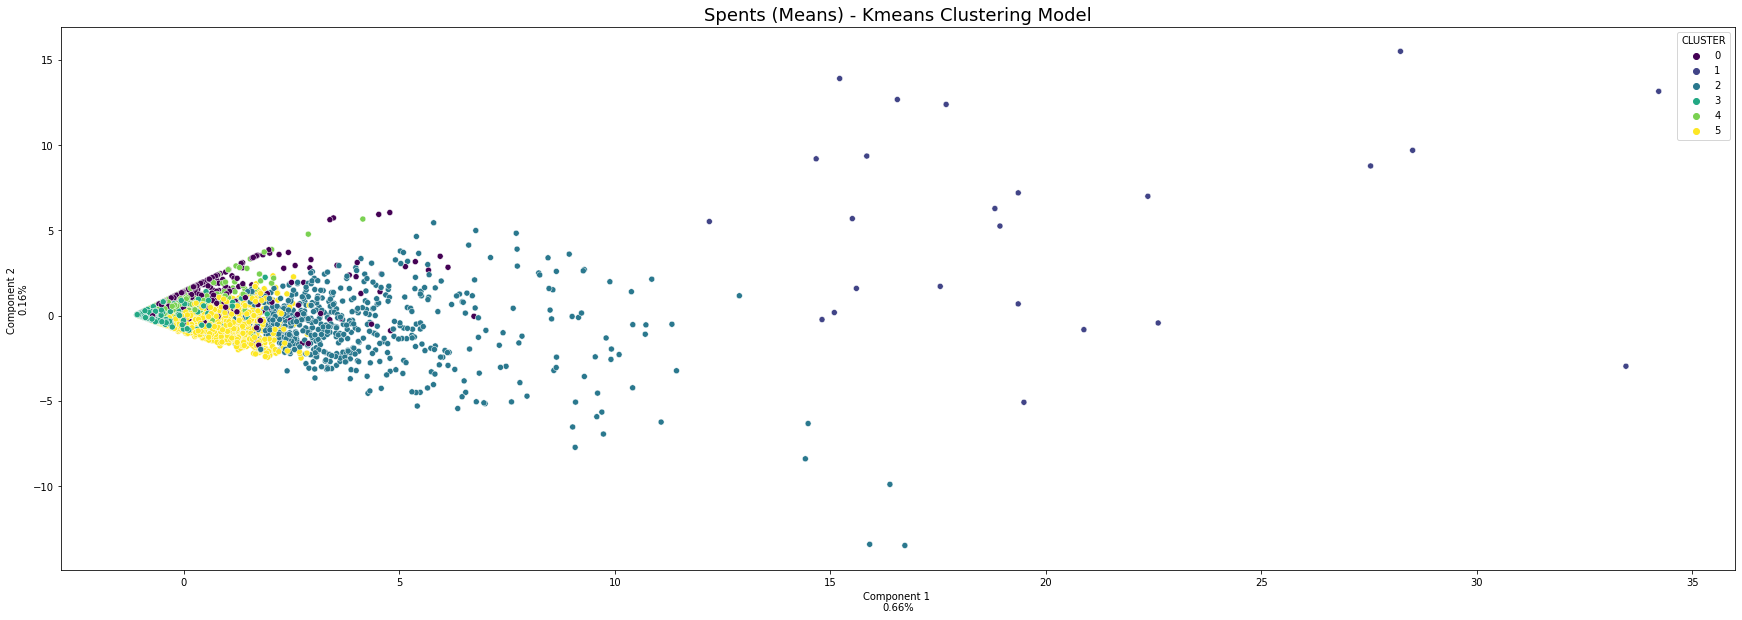

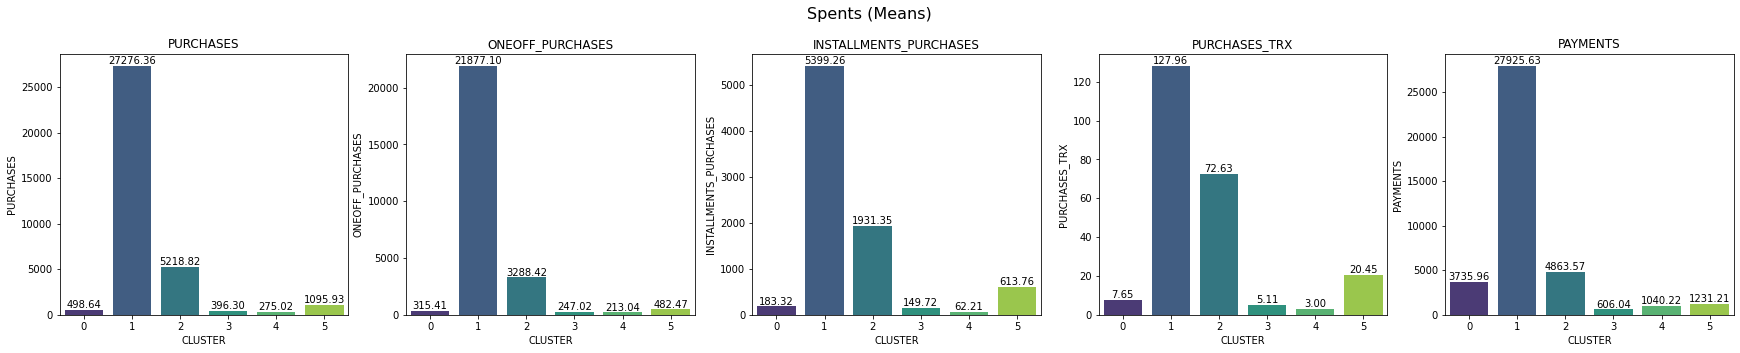

In [ ]:
# running a PCA model to plot the clusters
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scale[spents])

component_1_ratio = round(pca.explained_variance_ratio_[0],2)
component_2_ratio = round(pca.explained_variance_ratio_[1],2)
pca_dataframe = pd.DataFrame(data = principal_comp,columns = ['component_1','component_2'])

# concat labels with to the pca dataframe
pca_dataframe_kmeans = pd.concat([pca_dataframe,pd.DataFrame({'CLUSTER':df_scale_kmeans['CLUSTER']})],axis = 1)

# let's finally plot the clusters
plt.figure(figsize=(30,10))
ax = sns.scatterplot(x = "component_1", y = "component_2", hue = "CLUSTER",data = pca_dataframe_kmeans, palette = 'viridis',legend='full')
ax.set_title('Spents (Means) - Kmeans Clustering Model', size=18)
ax.set(xlabel='Component 1 \n{}%'.format(component_1_ratio), ylabel='Component 2 \n{}%'.format(component_2_ratio))

##################################

# plotting bar charts

# plot grid setup
a = 1  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

# plotting the graph
fig = plt.figure(figsize=(30,5))
fig.suptitle('Spents (Means)', fontsize=16)
fig.subplots_adjust(top=0.85)

for i in spents:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    chart = sns.barplot(x = describe_clusters_mean.index, y = i, data = describe_clusters_mean, palette='viridis')
    for p in chart.patches:
             chart.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
    c = c + 1

plt.show()

####**Cash advance metrics**

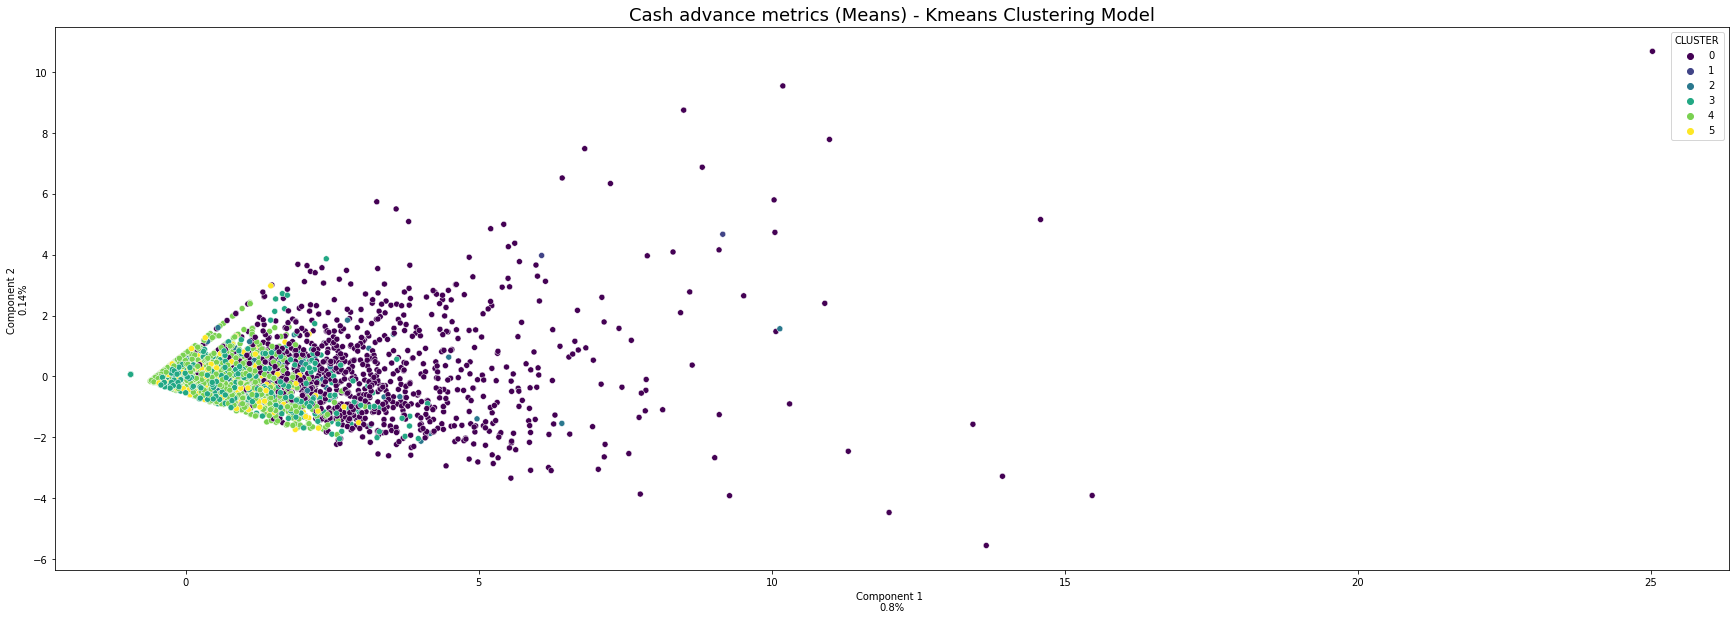

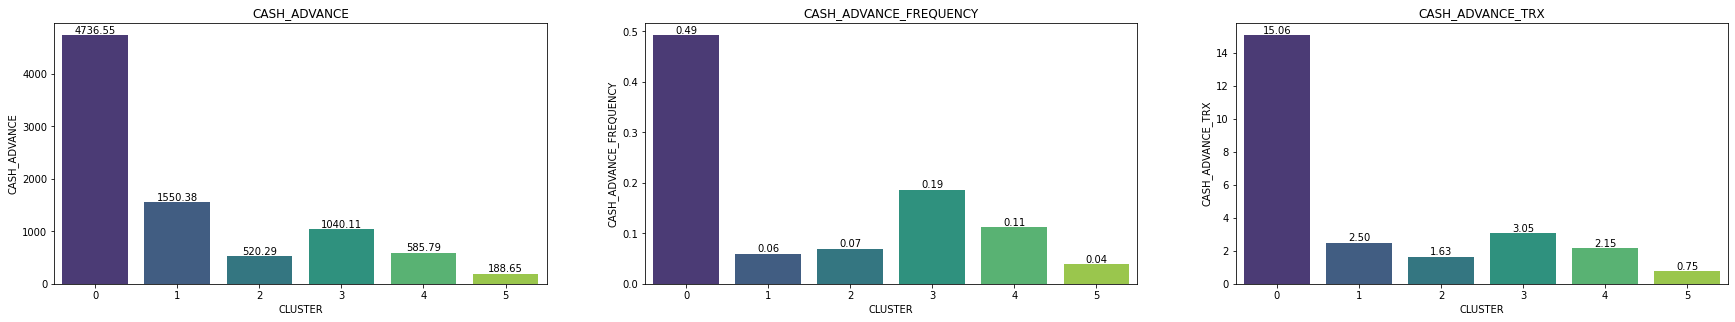

In [ ]:
# running a PCA model to plot the clusters
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scale[cash_advance_metrics])

component_1_ratio = round(pca.explained_variance_ratio_[0],2)
component_2_ratio = round(pca.explained_variance_ratio_[1],2)
pca_dataframe = pd.DataFrame(data = principal_comp,columns = ['component_1','component_2'])

# concat labels with to the pca dataframe
pca_dataframe_kmeans = pd.concat([pca_dataframe,pd.DataFrame({'CLUSTER':df_scale_kmeans['CLUSTER']})],axis = 1)

# let's finally plot the clusters
plt.figure(figsize=(30,10))
ax = sns.scatterplot(x = "component_1", y = "component_2", hue = "CLUSTER",data = pca_dataframe_kmeans, palette = 'viridis',legend='full')
ax.set_title('Cash advance metrics (Means) - Kmeans Clustering Model', size=18)
ax.set(xlabel='Component 1 \n{}%'.format(component_1_ratio), ylabel='Component 2 \n{}%'.format(component_2_ratio))


##################################

# plotting bar charts

# plot grid setup
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

# plotting the graph
fig = plt.figure(figsize=(30,5))
fig.subplots_adjust(top=0.85)

for i in cash_advance_metrics:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    chart = sns.barplot(x = describe_clusters_mean.index, y = i, data = describe_clusters_mean, palette='viridis')
    for p in chart.patches:
             chart.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
    c = c + 1

plt.show()

####**Payment methods**

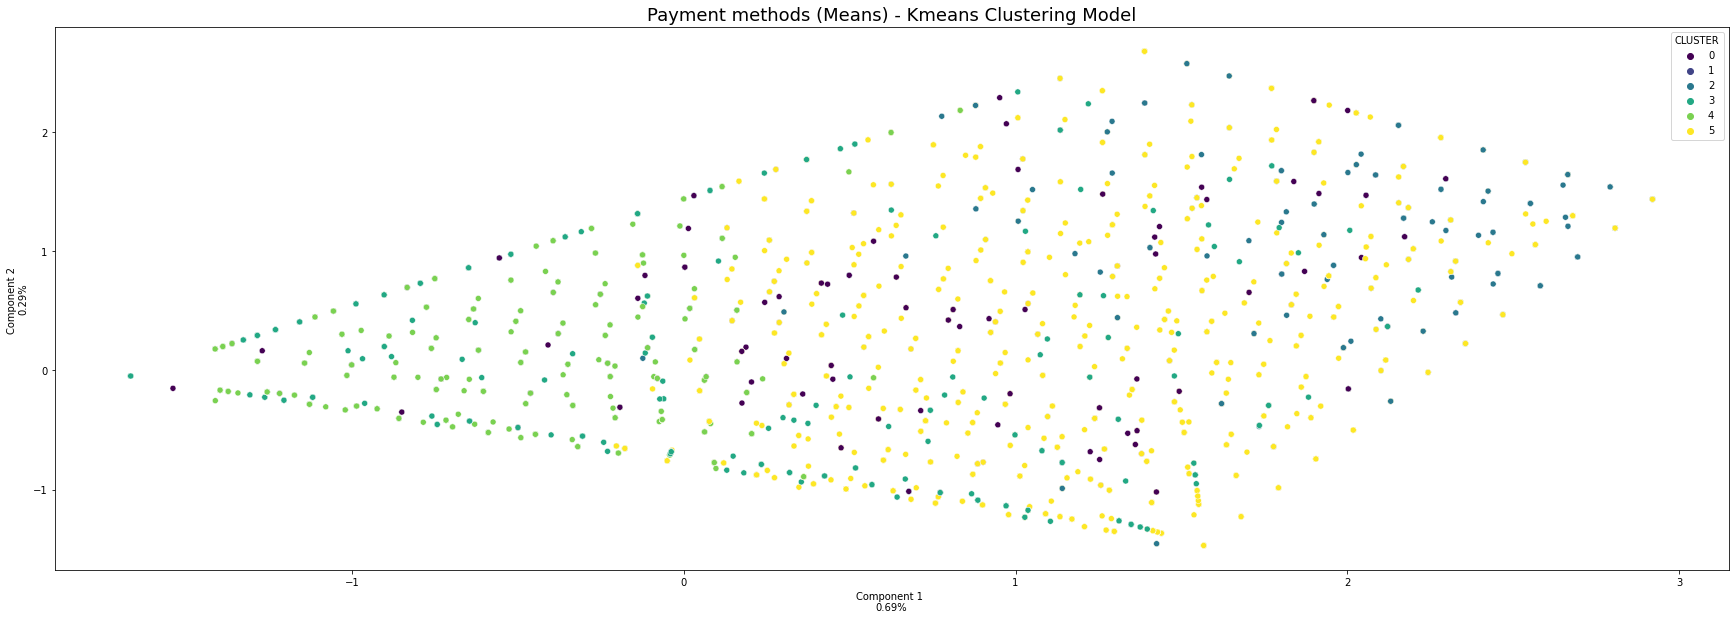

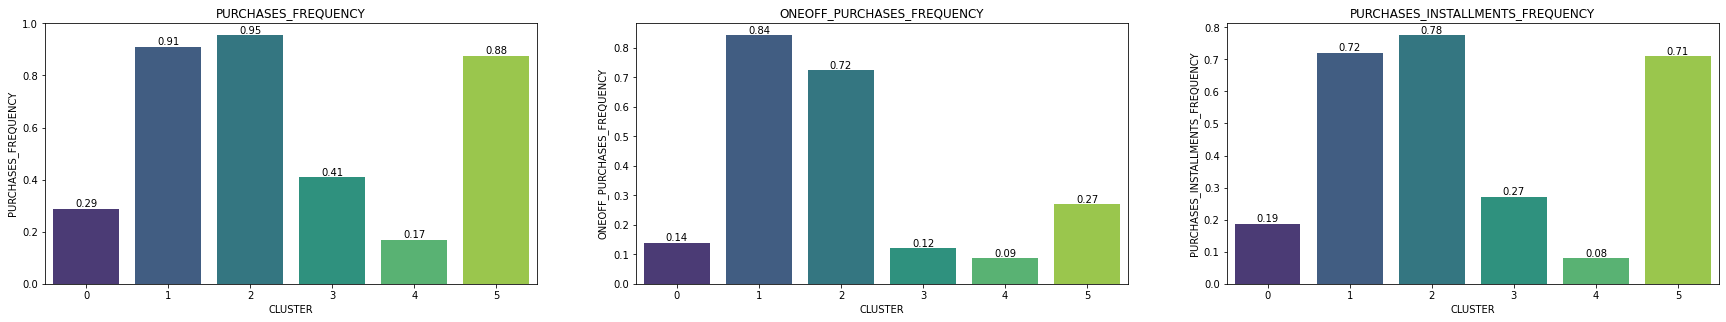

In [ ]:
# running a PCA model to plot the clusters
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scale[payment_methods])

component_1_ratio = round(pca.explained_variance_ratio_[0],2)
component_2_ratio = round(pca.explained_variance_ratio_[1],2)
pca_dataframe = pd.DataFrame(data = principal_comp,columns = ['component_1','component_2'])

# concat labels with to the pca dataframe
pca_dataframe_kmeans = pd.concat([pca_dataframe,pd.DataFrame({'CLUSTER':df_scale_kmeans['CLUSTER']})],axis = 1)

# let's finally plot the clusters
plt.figure(figsize=(30,10))
ax = sns.scatterplot(x = "component_1", y = "component_2", hue = "CLUSTER",data = pca_dataframe_kmeans, palette = 'viridis',legend='full')
ax.set_title('Payment methods (Means) - Kmeans Clustering Model', size=18)
ax.set(xlabel='Component 1 \n{}%'.format(component_1_ratio), ylabel='Component 2 \n{}%'.format(component_2_ratio))


##################################

# plotting bar charts

# plot grid setup
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

# plotting the graph
fig = plt.figure(figsize=(30,5))
fig.subplots_adjust(top=0.85)

for i in payment_methods:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    chart = sns.barplot(x = describe_clusters_mean.index, y = i, data = describe_clusters_mean, palette='viridis')
    for p in chart.patches:
             chart.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
    c = c + 1

plt.show()

####**Tenure**

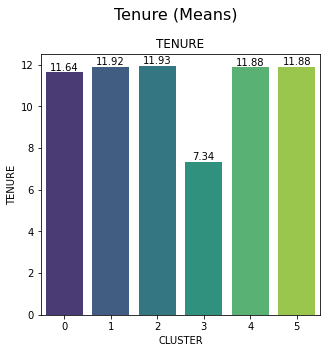

In [ ]:
# plot grid setup
a = 1  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

# plotting the graph
fig = plt.figure(figsize=(5,5))
fig.suptitle('Tenure (Means)', fontsize=16)
fig.subplots_adjust(top=0.85)

for i in tenure:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    chart = sns.barplot(x = describe_clusters_mean.index, y = i, data = describe_clusters_mean, palette='viridis')
    for p in chart.patches:
             chart.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
    c = c + 1

plt.show()

### Spider

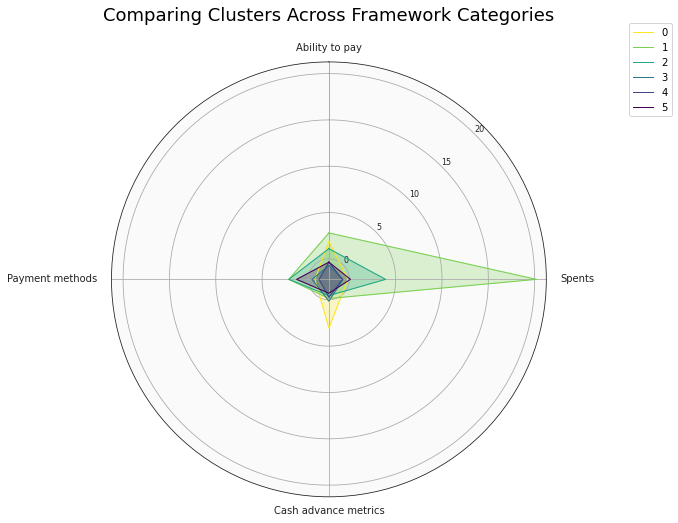

In [ ]:
# running a PCA model to plot the clusters
pca = PCA(n_components = 1)
principal_comp_ap = pca.fit_transform(df_scale[ability_to_pay])
principal_comp_sp = pca.fit_transform(df_scale[spents])
principal_comp_ca = pca.fit_transform(df_scale[cash_advance_metrics])
principal_comp_pm = pca.fit_transform(df_scale[payment_methods])

# creating the dataframe
pca_dataframe_spider = pd.DataFrame(data = principal_comp_ap, columns=['ability_to_pay'])
pca_dataframe_spider['spents'] = pd.DataFrame(data = principal_comp_sp)
pca_dataframe_spider['cash_advance_metrics'] = pd.DataFrame(data = principal_comp_ca)
pca_dataframe_spider['payment_methods'] = pd.DataFrame(data = principal_comp_pm)
pca_dataframe_spider['CLUSTER'] = pd.DataFrame(data = df_scale_kmeans['CLUSTER'])

# group by mean
pca_dataframe_spider_mean = pca_dataframe_spider.groupby("CLUSTER").mean()

# Each attribute we'll plot in the radar chart.
labels = ['Ability to pay', 'Spents', 'Cash advance metrics', 'Payment methods']

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Helper function to plot each cluster on the radar chart.
def add_to_radar(cluster, color):
  values = pca_dataframe_spider_mean.loc[cluster].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=cluster)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each cluster to the chart.
add_to_radar(0, '#fde725')
add_to_radar(1, '#7ad151')
add_to_radar(2, '#22a884')
add_to_radar(3, '#2a788e')
add_to_radar(4, '#414487')
add_to_radar(5, '#440154')


# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Set position of y-labels (0-100) to be in the middle of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Comparing Clusters Across Framework Categories', y=1.08,fontsize=18)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax;

## Conclusion

Because it is an iterative process, the results of k-means may be different with each run of the code. For this reason, I will not do an analysis for each graph. The idea behind it was to show how this presentation of the results can help to decoupage the behavior of each cluster, as well as to understand how each cluster can be characterized with the help of the concept map.

I hope it helps those who need it and that you enjoy it. 
Also send me critics and suggestions. 
I am always open to learning and improving. :-)